# Let's get started! ⚡

## Import Module

### Basic Module

In [75]:
# Exploratory Data Analysis
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Visualization

In [76]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette('Set2')

### Data Preprocessing

In [77]:
# Data preprocessing
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Models

In [78]:
# Machine Learning
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, StackingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

# Data Reading

In [79]:
# 데이터 읽어오기
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [80]:
# 헤드 확인
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
# 데이터의 컬럼 수 확인
print(df_train.shape, df_test.shape)

(891, 12) (418, 11)


# Exploratory Data Analysis 📊🤔

## 데이터 정리

In [82]:
Survived = df_train['Survived']
train_idx = df_train.index
test_idx = df_test.index

In [83]:
# 쉬운 분석을 위해 학습데이터와 테스트데이터 프레임 합치기
data = pd.concat([df_train.iloc[:,2:], df_test.iloc[:,1:]], axis=0, sort=False)

## 합친 데이터 분석

### 기본 정보 확인

In [84]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


### 결측치 채우기 위한 분석

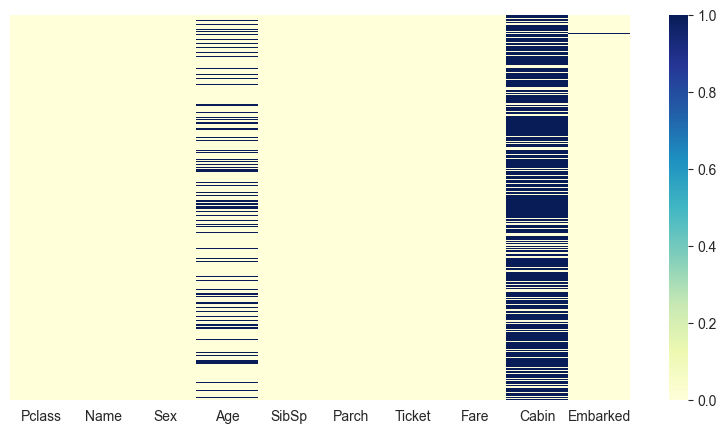

In [86]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
palette=sns.color_palette("pastel")
sns.heatmap(data.isna(), yticklabels=False, cmap="YlGnBu")
sns.set
plt.show()

In [87]:
# 'Cabin' 컬럼 드랍
data.drop('Cabin', axis=1, inplace=True)

In [88]:
data[data.Embarked.isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [89]:
# 'Pclass'=1인 사람의 Embarked 분포 확인
data[data['Pclass']==1]['Embarked'].value_counts()

Embarked
S    177
C    141
Q      3
Name: count, dtype: int64

<Axes: xlabel='Sex'>

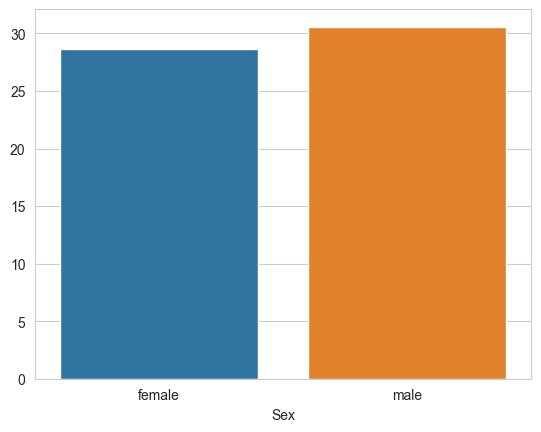

In [90]:
# 'Sex'에 따른 'Age' 분포 표시
sns.barplot(x=data.groupby('Sex')['Age'].agg(np.mean).index, y=data.groupby('Sex')['Age'].agg(np.mean).values)

In [91]:
data.groupby('Sex')['Age'].agg(np.mean)

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

<Axes: xlabel='Pclass'>

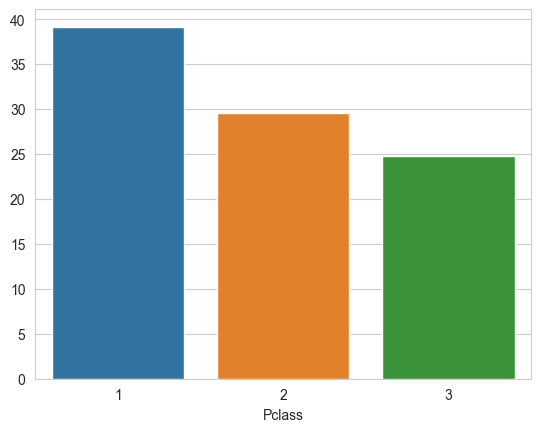

In [92]:
# 'Pclass'에 따른 'Age' 분포 표시
sns.barplot(x=data.groupby('Pclass')['Age'].agg(np.mean).index, y=data.groupby('Pclass')['Age'].agg(np.mean).values)

In [93]:
data.groupby('Pclass')['Age'].agg(np.mean)

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [94]:
data[data.Fare.isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


<Axes: xlabel='Fare', ylabel='Count'>

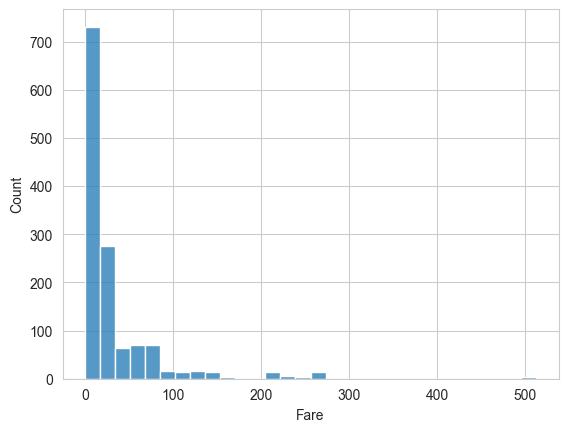

In [95]:
sns.histplot(data.Fare,bins=30)

In [96]:
data.groupby('Pclass')['Fare'].agg(np.mean)

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

### 학습데이터만 떼어서 분석

In [97]:
#Creating subset only for EDA

data_exp = data.iloc[:891]
data_exp['Survived'] = df_train.Survived

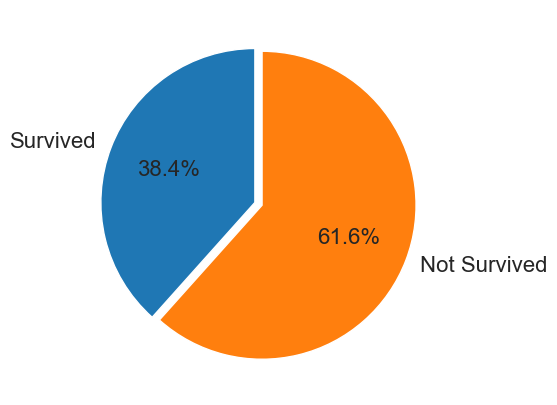

In [98]:
category_names = ['Survived','Not Survived']
size = [data_exp['Survived'].value_counts()[1],data_exp['Survived'].value_counts()[0]]

# Pie chart
plt.figure(figsize=(5,5), dpi=100)
plt.pie(size, labels=category_names, textprops={'fontsize':16}, startangle=90, autopct='%1.1f%%',
        explode=[0,0.05])
plt.show()

In [99]:
data_exp.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [100]:
data_exp.groupby('Survived')['Embarked'].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: count, dtype: int64

In [101]:
data_exp.groupby('Survived')['Fare'].agg(['mean','min','max'])

,mean,min,max
Survived,,,
0,22.117887,0.0,263.0000
1,48.395408,0.0,512.3292


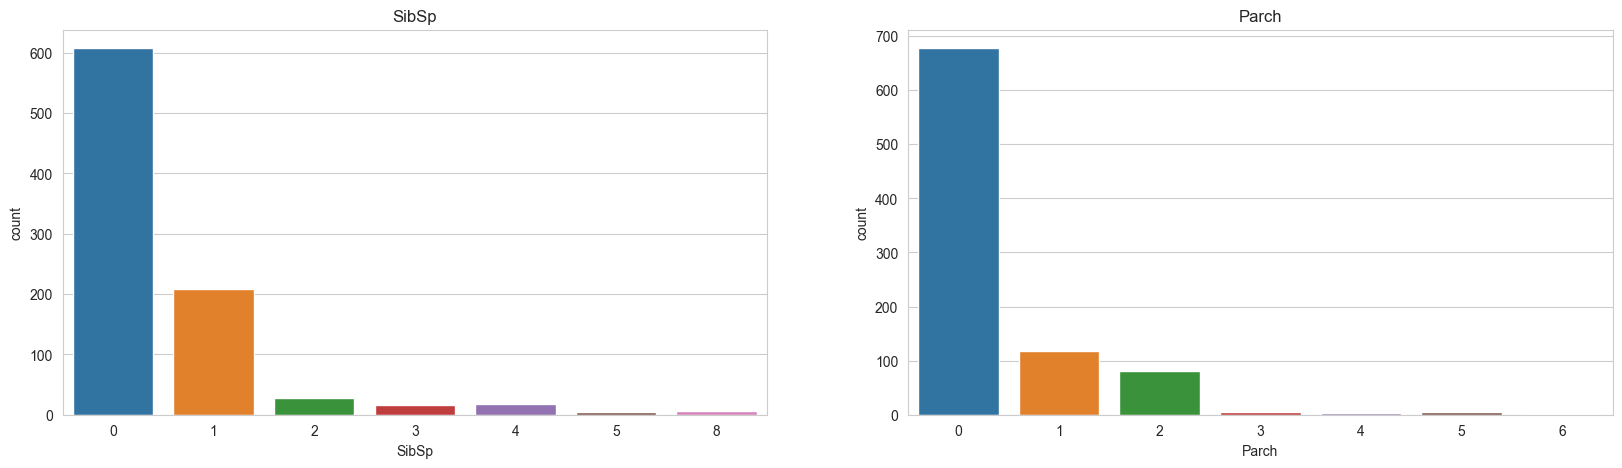

In [102]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.barplot(x=data_exp.SibSp.value_counts().index, y=data_exp.SibSp.value_counts(), ax=ax[0])
ax[0].set_title('SibSp')
sns.barplot(x=data_exp.Parch.value_counts().index, y=data_exp.Parch.value_counts(), ax=ax[1])
ax[1].set_title('Parch')
plt.show()

In [103]:
data_exp.groupby('Ticket')['Survived'].value_counts()

Ticket       Survived
110152       1           3
110413       1           2
             0           1
110465       0           2
110564       1           1
                        ..
W./C. 6609   0           1
W.E.P. 5734  0           1
W/C 14208    0           1
WE/P 5735    0           1
             1           1
Name: count, Length: 730, dtype: int64

# Data Preprocessing ⚙️🧹

## 1차 전처리 함수 선언

### 학습데이터와 테스트데이터 합치기

In [104]:
# 학습데이터와 테스트데이터 합치기
def concat_train_test_data(df_train=None, df_test=None):
    df = pd.concat([df_train, df_test], axis=0, sort=False).reset_index(drop=True)
    df['PassengerId'] = df['PassengerId'].astype(int)
    return df

### 잘못된 승객정보 정정
---
* Thanks to @Nadezda Demidova : https://www.kaggle.com/demidova/titanic-eda-tutorial-with-seaborn
---

In [105]:
# 잘못된 승객정보 정정
def correct_wrong_passenger_info(df=None):
    df.loc[df['PassengerId'] == 631, 'Age'] = 48

    # Passengers with wrong number of siblings and parch
    df.loc[df['PassengerId'] == 69, ['SibSp', 'Parch']] = [0,0]
    df.loc[df['PassengerId'] == 1106, ['SibSp', 'Parch']] = [0,0]

    return df

### 'Title' 컬럼 생성

In [106]:
# 'Name' 컬럼에서 'Title' 컬럼 생성하기
# 의미있는 호칭(Mr, Mrs, Miss, Master)을 추출하는 과정입니다.

# 'Title' 생성하는 함수
def get_Title(name=None):
    top4_titles = ('Mr', 'Mrs', 'Miss', 'Master')

    # top4 호칭으로 바꿔줄 소수 여성 호칭
    female_titles_to_Mrs = ('Mme', 'the Countess', 'Dona', 'Lady')
    female_titles_to_Miss = ('Mlle', 'Ms')

    # top4 호칭으로 바꿔줄 소수 남성 호칭
    male_titles_to_Mr = ('Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer', 'Rev')

    # 예 : "Braund, Mr. Owen Harris"에서 'Mr' 추출
    # '.'(마침표) 기준으로 이름을 자르고, ','(콤마) 제거
    title = name.split('.')[0].split(', ')[-1]

    # 호칭에 따라 변환해서 리턴
    if title in top4_titles:
        return title
    elif title in female_titles_to_Mrs:
        return 'Mrs'
    elif title in female_titles_to_Miss:
        return 'Miss'
    elif title in male_titles_to_Mr:
        return 'Mr'
    else:
        return title

In [107]:
# 남녀 양쪽 전부 존재하는 호칭 처리 함수
def processing_title_on_both_side(df=None):
    # 조건 설정
    title_on_both_side = ['Dr']
    cond_mr = (df['Sex'] == 'male') & (df['Title'].isin(title_on_both_side))
    cond_mrs = (df['Sex'] == 'female') & (df['Title'].isin(title_on_both_side))

    # 치환
    df.loc[cond_mr, 'Title'] = 'Mr'
    df.loc[cond_mrs, 'Title'] = 'Mrs'

    return df

In [108]:
# 'Title'(호칭) 생성
def make_Title(df=None):
    df['Title'] = df['Name'].map(get_Title)

    # 남녀 양쪽 전부 존재하는 호칭에 대한 처리
    df = processing_title_on_both_side(df)

    return df

### 단일 피쳐 생성

In [109]:
# 'Surname'(성씨) 생성
def make_Surname(df=None):
    df['Surname'] = df['Name'].map(lambda name: name.split(',')[0].strip())
    return df

In [110]:
# 'Family' 생성
def make_Family(df=None):
    df['Family'] = df['SibSp'].astype(int) + df['Parch'].astype(int)
    return df

## 1차 전처리 함수 모음

In [111]:
# 1차 전처리 함수 모음
def first_preprocessing(df_train=None, df_test=None):
    # 학습데이터와 전처리데이터 합치기
    df = concat_train_test_data(df_train, df_test)

    # 잘못된 승객정보 정정
    df = correct_wrong_passenger_info(df)

    # 호칭 만들기
    df = make_Title(df)

    # 'Surname'(성씨) 생성
    df = make_Surname(df)

    # 'Family' 생성
    df = make_Family(df)

    return df

In [112]:
# 1차 전처리 함수 실행
df = first_preprocessing(df_train, df_test)

## 1차 전처리 후 통계 확인

### 'Age' 결측치 채우기 위한 확인

In [113]:
df.groupby('Title')['Age'].agg({'mean', 'median'})

,median,mean
Title,,
Master,4.0,5.482642
Miss,22.0,21.824366
Mr,30.0,32.731405
Mrs,36.0,37.040000


### 'Fare' 결측치 채우기 위한 확인

In [114]:
df.groupby('Pclass')['Fare'].agg({'mean', 'median', 'max'})

,median,mean,max
Pclass,,,
1,60.0000,87.508992,512.3292
2,15.0458,21.179196,73.5000
3,8.0500,13.302889,69.5500


### 'Embarked' 결측치 채우기 위한 확인

In [115]:
df.loc[df['Embarked'].isnull()][['Name', 'Pclass', 'Sex', 'Title']]

,Name,Pclass,Sex,Title
61,"Icard, Miss. Amelie",1,female,Miss
829,"Stone, Mrs. George Nelson (Martha Evelyn)",1,female,Mrs


In [116]:
df.groupby('Pclass')['Embarked'].value_counts().to_frame()

count
Pclass Embarked       
1      S           177
       C           141
       Q             3
2      S           242
       C            28
       Q             7
3      S           495
       Q           113
       C           101

## 2차 전처리 함수 선언

### 결측치 채우기

In [117]:
# 'Age' 컬럼 결측치 채우기
def Age_Imputer(df=None):
    df['Age'] = df.groupby('Title')['Age'].transform(lambda x: x.fillna(x.median()))
    df['Age'] = df['Age'].astype('int64')
    return df

In [118]:
# 'Fare' 컬럼 결측치 채우기
def Fare_Imputer(df=None):
    df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.mean()))
    return df

In [119]:
# 'Embarked' 컬럼 결측치 채우기
def Embarked_Imputer(df=None):
    # Null인 두 사람이 전부 Pclass=1 => '1'에는 'S'가 제일 많다.
    df.loc[df['Embarked'].isnull(), 'Embarked'] = 'S'
    return df

In [120]:
# 결측치 채우는 함수
def Data_Imputer(df=None):
    df = Age_Imputer(df)
    df = Fare_Imputer(df)
    df = Embarked_Imputer(df)
    return df

### 'Family_Survival' 컬럼 생성
---
* Thanks to @S.XU : https://www.kaggle.com/code/shunjiangxu/blood-is-thicker-than-water-friendship-forever/notebook
---

In [121]:
# 'Family_Survival' 컬럼 생성
def make_Family_Survival(df=None):
    def_survive_val = 0.5
    df['Family_Survival'] = def_survive_val

    for grp, grp_df in df.groupby(['Surname', 'Fare']):
        if (len(grp_df) != 1):
            # 가족 그룹(같은 성씨, Fare 2명 이상)을 찾았다.
            for idx, row in grp_df.iterrows():
                max_sur = grp_df.drop(idx)['Survived'].max()
                min_sur = grp_df.drop(idx)['Survived'].min()
                passID = row['PassengerId']
                # 다른 가족의 생존 여부를 이 컬럼에 기록함
                if (max_sur == 1.0):
                    df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (min_sur == 0.0):
                    df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 0

    for _, grp_df in df.groupby('Ticket'):
        if (len(grp_df) != 1):
            # 같은 티켓번호를 가진 다른 사람을 찾았다.
            for idx, row in grp_df.iterrows():
                if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                    max_sur = grp_df.drop(idx)['Survived'].max()
                    min_sur = grp_df.drop(idx)['Survived'].min()
                    passID = row['PassengerId']
                    # 같은 티켓번호를 가진 다른 사람의 생존 여부를 이 컬럼에 기록함
                    if (max_sur == 1.0):
                        df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 1
                    elif (min_sur == 0.0):
                        df.loc[df['PassengerId'] == passID, 'Family_Survival'] = 0

    return df

### 추가 피쳐 생성 및 매핑

In [122]:
# 카테고리화 피쳐 생성
def make_categorical_columns(df=None):
    # 'Age_Cat' 생성
    df['Age_Cat'] = pd.qcut(df['Age'], 4)
    # 'Fare_Cat' 생성
    df['Fare_Cat'] = pd.qcut(df['Fare'], 5)
    return df

### 레이블 인코딩

In [123]:
# 레이블 인코딩
def label_encoder(df=None):
    encoder = LabelEncoder()
    columns = ['Sex', 'Embarked', 'Title', 'Age_Cat', 'Fare_Cat']
    for column in columns:
        df[column] = encoder.fit_transform(df[column])

    return df

### 컬럼명을 강제로 str로 형변환

In [124]:
# 컬럼명을 강제로 str로 형변환
# 알고리즘에 따라 이 작업이 필요합니다.
def columns_index_to_str_type(df=None):
    df.columns = df.columns.astype(str)
    return df

### 필요없는 컬럼들 드랍

In [125]:
# 필요없는 컬럽들 드랍
def drop_columns(df=None):
    columns = ['Title', 'Fare', 'Age', 'Name'
               , 'PassengerId', 'SibSp', 'Parch', 'Embarked'
               , 'Cabin', 'Ticket', 'Surname']
    df.drop(columns=columns, inplace=True)

    return df

## 2차 전처리 함수 모음

In [126]:
# 2차 전처리 함수 모음
def second_preprocessing(df=None):
    # 결측치 채우기
    df = Data_Imputer(df)

    # 'Family_Survival' 컬럼 생성
    df = make_Family_Survival(df)

    # 카테고리화 컬럼 생성
    df = make_categorical_columns(df)

    # 레이블 인코딩
    df = label_encoder(df)

    # 컬럼명을 강제로 str로 형변환
    df = columns_index_to_str_type(df)

    # 필요없는 컬럼들 드랍
    df = drop_columns(df)

    return df

In [127]:
# 2차 전처리 함수 실행
df = second_preprocessing(df)

## 전처리 결과 확인

### 결측치 존재여부 확인

In [128]:
df.isnull().sum()

Survived           418
Pclass               0
Sex                  0
Family               0
Family_Survival      0
Age_Cat              0
Fare_Cat             0
dtype: int64

### 피어슨 계수 행렬 시각화

In [129]:
# 피어슨 계수 행렬 시각화
def plot_Pearson_heatmap(df=None):
    corr_matrix = pd.get_dummies(df).corr(method='pearson')

    plt.figure(figsize=(12, 12))
    sns.heatmap(
        corr_matrix, annot=True, cmap='coolwarm', fmt=".2f"
    )
    plt.title("Pearson Correlation Heatmap")
    plt.show()
    return

# plot_Pearson_heatmap(df)

### 데이터프레임 확인

In [130]:
df.head(3)

,Survived,Pclass,Sex,Family,Family_Survival,Age_Cat,Fare_Cat
0,0.0,3,1,1,0.5,0,0
1,1.0,1,0,1,0.5,3,4
2,1.0,3,0,0,0.5,1,1


# Model Fitting

## 학습데이터와 테스트데이터 분리

In [131]:
# 학습데이터와 테스트데이터 분리
train_set = df.iloc[:df_train.shape[0],]
test_set = df.iloc[df_train.shape[0]:,]

# 학습데이터의 데이터와 답 분리
X_train = train_set.drop(['Survived'], axis=1)
y_train = train_set['Survived']

# 테스트데이터 생성
X_test = test_set.drop(['Survived'], axis=1)

## Scaling

In [132]:
# StandardScaling
def standard_scaling(X_train=None, X_test=None):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

X_train, X_test = standard_scaling(X_train, X_test)

## 공통 파라미터 선언

In [133]:
model_result = pd.DataFrame(columns=['Model','Score','Parameters'])

cv = RepeatedStratifiedKFold(
      n_splits=10
    , n_repeats=5
    , random_state=42
)

## GridsearchCV 함수

In [134]:
def GridSearch_CV(model=None, grid=None, X_train=None, y_train=None):
    grid_search = GridSearchCV(
          estimator=model
        , param_grid=grid
        , n_jobs=-1
        , cv=cv
        , scoring='accuracy'
        , error_score=0
    )
    grid_result = grid_search.fit(X_train, y_train)
    best_model = {
          'Model':model.__class__.__name__
        , 'Score':grid_result.best_score_
        , 'Parameters':grid_result.best_params_
        , 'best_estimator':grid_result.best_estimator_
    }
    return best_model

## 최적 Model 데이터 추가 함수

In [135]:
def append_model_result_list(best_model=None, model_result=None):
    data = [
          best_model['Model']
        , best_model['Score']
        , best_model['Parameters']
    ]
    model_result.loc[len(model_result)] = data

    best_model_name = best_model['Model']
    best_model_score = best_model['Score']
    best_model_parameters = best_model['Parameters']

    print(f'#### {best_model_name} ####')
    print(f'Best Score: {best_model_score:.5f}')
    print(f'Best Parameters: {best_model_parameters}')
    return model_result


## Model Submission 생성 함수

In [136]:
def make_model_submission(model=None, X_test=None):
   model_submission = pd.read_csv('./gender_submission.csv')

   model_submission.Survived = model.predict(X_test)
   model_submission['Survived'] = model_submission['Survived'].astype(int)

   filename =  f'./data/{model.__class__.__name__}_submission.csv'
   model_submission.to_csv(filename, index=False)
   print('your submission file is saved!')
   return

## LogisticRegression

In [137]:
model = LogisticRegression()

solvers = ['lbfgs', 'liblinear', 'newton-cg']
penalty = ['l1','l2','elasticnet']
c_values = [0.001, 0.01, 0.1, 1, 10]

grid = dict(
      solver=solvers
    , penalty=penalty
    , C=c_values
)

In [138]:
best_model = GridSearch_CV(model, grid, X_train, y_train)
model_result = append_model_result_list(best_model, model_result)

#### LogisticRegression ####
Best Score: 0.82849
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [139]:
final_model = best_model['best_estimator']
make_model_submission(final_model, X_test)

your submission file is saved!


## RidgeClassifier

In [140]:
model = RidgeClassifier()

alpha = [1.10, 1.13, 1.15, 1.18]
grid = dict(alpha=alpha)

In [141]:
best_model = GridSearch_CV(model, grid, X_train, y_train)
model_result = append_model_result_list(best_model, model_result)

#### RidgeClassifier ####
Best Score: 0.82916
Best Parameters: {'alpha': 1.1}


In [142]:
final_model = best_model['best_estimator']
make_model_submission(final_model, X_test)

your submission file is saved!


## KNeighborsClassifier

In [143]:
model = KNeighborsClassifier()

n_neighbors = [6,7,8,9,10,11,12,14,16,18,20,22]
algorithm = ['auto']
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
leaf_size = list(range(1,50,5))

grid = dict(
    n_neighbors=n_neighbors
  , algorithm=algorithm
  , weights=weights
  , metric=metric
  , leaf_size=leaf_size
)

In [144]:
best_model = GridSearch_CV(model, grid, X_train, y_train)
model_result = append_model_result_list(best_model, model_result)

#### KNeighborsClassifier ####
Best Score: 0.84622
Best Parameters: {'algorithm': 'auto', 'leaf_size': 6, 'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'uniform'}


In [145]:
final_model = best_model['best_estimator']
make_model_submission(final_model, X_test)

your submission file is saved!


## DecisionTreeClassfier

In [146]:
model = DecisionTreeClassifier()

max_depth = [3,6,12]
min_samples_leaf = [4,8,12]
min_samples_split = [3,6,9]

grid = dict(
    max_depth=max_depth
  , min_samples_leaf=min_samples_leaf
  , min_samples_split=min_samples_split
)

In [147]:
best_model = GridSearch_CV(model, grid, X_train, y_train)
model_result = append_model_result_list(best_model, model_result)

#### DecisionTreeClassifier ####
Best Score: 0.84511
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 3}


In [148]:
final_model = best_model['best_estimator']
make_model_submission(final_model, X_test)

your submission file is saved!


## RandomForestClassifier

In [149]:
model = RandomForestClassifier()

n_estimators = [100, 200, 300]
max_features = ['sqrt','log2']

grid = dict(
    n_estimators=n_estimators
    , max_features=max_features
)

In [150]:
best_model = GridSearch_CV(model, grid, X_train, y_train)
model_result = append_model_result_list(best_model, model_result)

#### RandomForestClassifier ####
Best Score: 0.83929
Best Parameters: {'max_features': 'sqrt', 'n_estimators': 300}


In [151]:
final_model = best_model['best_estimator']
make_model_submission(final_model, X_test)

your submission file is saved!


## ExtraTreesClassifier

In [152]:
model = ExtraTreesClassifier()

n_estimators = [100,200,300]
max_features = ['sqrt','log2']
bootstrap = [True, False]

grid = dict(
    n_estimators=n_estimators
    , max_features=max_features
    , bootstrap=bootstrap
)

In [153]:
best_model = GridSearch_CV(model, grid, X_train, y_train)
model_result = append_model_result_list(best_model, model_result)

#### ExtraTreesClassifier ####
Best Score: 0.84377
Best Parameters: {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 100}


In [154]:
final_model = best_model['best_estimator']
make_model_submission(final_model, X_test)

your submission file is saved!


## BaggingClassifier

In [155]:
model = BaggingClassifier()

n_estimators = [1500, 1750]
grid = dict(n_estimators=n_estimators)

In [156]:
best_model = GridSearch_CV(model, grid, X_train, y_train)
model_result = append_model_result_list(best_model, model_result)

#### BaggingClassifier ####
Best Score: 0.84130
Best Parameters: {'n_estimators': 1500}


In [157]:
final_model = best_model['best_estimator']
make_model_submission(final_model, X_test)

your submission file is saved!


## XGBClassifier

In [158]:
model = XGBClassifier()

max_depth = [3,6,7]
learning_rate = [0.1,0.2]
n_estimators = [200,300]
min_child_weight = [4]
reg_alpha = [6.0]
reg_lambda = [1,8]
max_delta_step = [2]
gamma= [0]
seed = [1]

grid = dict(
      max_depth=max_depth
    , learning_rate=learning_rate
    , n_estimators=n_estimators
    , min_child_weight=min_child_weight
    , reg_alpha=reg_alpha
    , reg_lambda=reg_lambda
    , max_delta_step=max_delta_step
    , gamma=gamma
    , seed=seed
)

In [159]:
best_model = GridSearch_CV(model, grid, X_train, y_train)
model_result = append_model_result_list(best_model, model_result)

#### XGBClassifier ####
Best Score: 0.84533
Best Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 2, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 200, 'reg_alpha': 6.0, 'reg_lambda': 8, 'seed': 1}


In [160]:
final_model = best_model['best_estimator']
make_model_submission(final_model, X_test)

your submission file is saved!


## 모델별 성능 비교

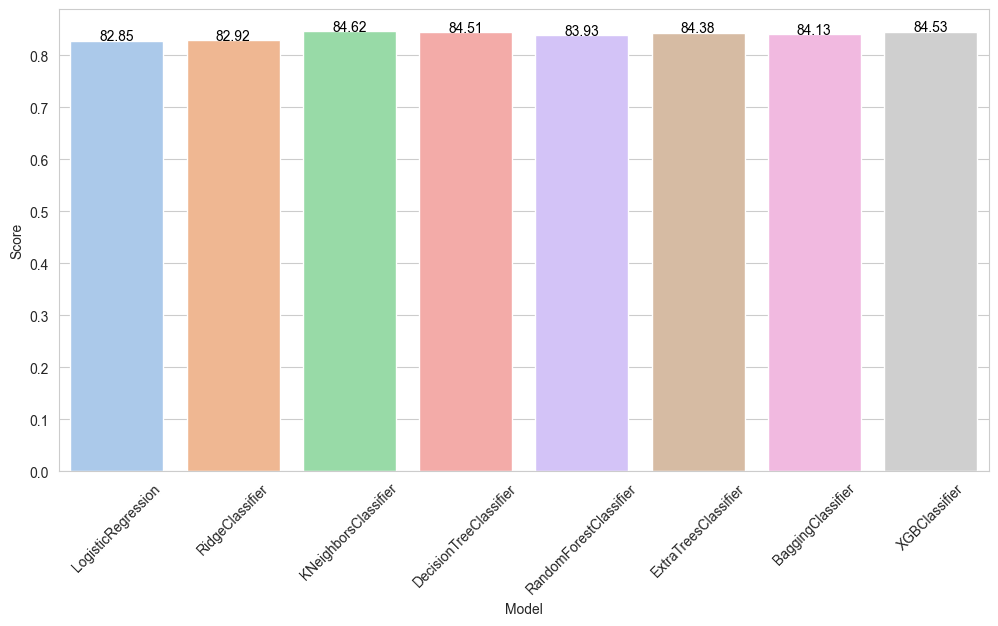

In [161]:
plt.figure(figsize=(12,6))
g = sns.barplot(x='Model', y='Score', data=model_result)

for index, row in model_result.iterrows():
    g.text(row.name,row.Score, round(row.Score*100,2), color='black', ha="center")
plt.xticks(rotation=45)
plt.show()

# Stacking Classifier

In [163]:
# define base learner models
level0 = list()
level0.append(('rd', RidgeClassifier(alpha= 1.13)))
level0.append(('svc', SVC(C=0.9, decision_function_shape='ovo', degree=3, gamma=0.1, kernel='rbf', probability=True, random_state=0)))
level0.append(('kn', KNeighborsClassifier(algorithm='auto', leaf_size=16, n_neighbors=18, metric='manhattan', weights='uniform')))
level0.append(('dt', DecisionTreeClassifier(max_depth=3, min_samples_leaf=4, min_samples_split=3)))
level0.append(('rf', RandomForestClassifier(n_estimators=300, max_features='log2')))
level0.append(('et', ExtraTreesClassifier(n_estimators=200, max_features='sqrt', bootstrap=False, class_weight=None)))
level0.append(('xgb', XGBClassifier(gamma=0, learning_rate=0.2, max_delta_step=2, max_depth=3, min_child_weight=4, n_estimators=200, reg_alpha=6.0, reg_lambda=1, seed=1)))
level0.append(('gb', GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=0.7)))
# define meta learner model
level1 = LogisticRegression(C=14, penalty='l1',solver= 'liblinear')

In [164]:
stacking_clf = StackingClassifier(estimators=level0, final_estimator=level1,n_jobs=-1)

In [165]:
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('rd', RidgeClassifier(alpha=1.13)),
                               ('svc',
                                SVC(C=0.9, decision_function_shape='ovo',
                                    gamma=0.1, probability=True,
                                    random_state=0)),
                               ('kn',
                                KNeighborsClassifier(leaf_size=16,
                                                     metric='manhattan',
                                                     n_neighbors=18)),
                               ('dt',
                                DecisionTreeClassifier(max_depth=3,
                                                       min_samples_leaf=4,
                                                       min_samples_split=3)),
                               ('rf',
                                RandomForestClassifier(max_fe...
                                              max_delta_step=2, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=4, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.01,
                                                           n_estimators=1000,
                                                           subsample=0.7))],
                   final_estimator=LogisticRegression(C=14, penalty='l1',
                                                      solver='liblinear'),
                   n_jobs=-1)

In [167]:
make_model_submission(stacking_clf, X_test)

your submission file is saved!
